In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('data/lifetime-ranks.csv', index_col=['brand'])
df.head()

,currentRating,lifetimeRating,currentRank,ltRank
brand,,,,
Dr Puri,44.250000,34.302326,10.0,10.0
HIGUARD,45.833333,37.424242,4.0,6.0
Hwipure,46.587302,37.291779,1.0,7.0
Kitsch,43.960588,32.559368,11.0,12.0
Kosette,43.922039,36.472493,12.0,8.0


In [45]:
df.sort_values('currentRank', inplace=True)
df

,currentRating,lifetimeRating,currentRank,ltRank
brand,,,,
Hwipure,46.587302,37.291779,1.0,7.0
Zidian,46.498516,39.292929,2.0,2.0
Puritas,45.869565,39.047174,3.0,3.0
HIGUARD,45.833333,37.424242,4.0,6.0
Lozperi,45.757143,39.653379,5.0,1.0
YJ Corporation,45.588235,36.220472,6.0,9.0
La Hauteur,45.511111,38.034188,7.0,5.0
Sunjoy,44.285714,38.591160,8.0,4.0
Tony Moly,44.275862,32.000000,9.0,13.0


In [12]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Current & Lifetime Ranks of Top Brands')

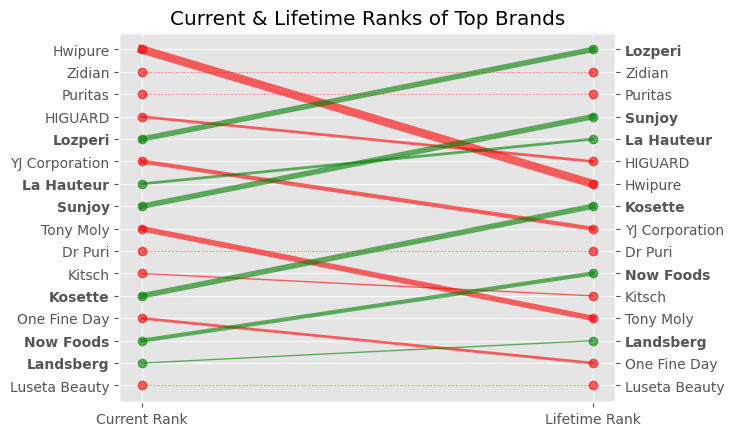

In [79]:
fig, ax = plt.subplots()

ax.invert_yaxis()
ax.set_yticks(df['currentRank'].values, labels=df.index)
ax.set_xticks([0, 1], labels=['Current Rank', 'Lifetime Rank'])

ax2 = ax.twinx()
ax2.plot([1] * 16, df['ltRank'], 'o', alpha=0, zorder=2)
ax2.invert_yaxis()
xdf = df.sort_values('ltRank')
ax2.set_yticks(xdf['ltRank'].values, labels=xdf.index)

for brand, row in df.iterrows():
    x = [0, 1]
    crank, ltrank = row[['currentRank', 'ltRank']]
    if ltrank < crank:
        fmt = 'go-'
        lw = abs(crank - ltrank)
        kwargs = dict(alpha=0.6, lw=lw)
    elif ltrank == crank:
        fmt = 'ro--'
        kwargs = dict(alpha=0.6, lw=0.5)
    else:
        fmt = 'ro-'
        kwargs = dict(alpha=0.6, lw = abs(crank - ltrank))
    
    ax.plot(x, [crank, ltrank], fmt, zorder=2, **kwargs)
ax2.grid(False)

left = [4, 6, 7, 11, 13, 14]
leftlabels = ax.get_yticklabels()
[leftlabels[l].set_weight('bold') for l in left]

right = [0, 3, 4, 7, 10, 13]
rightlabels = ax2.get_yticklabels()
[rightlabels[l].set_weight('bold') for l in right]


plt.title('Current & Lifetime Ranks of Top Brands')

In [64]:
ax.set_xticklabels?

Signature: ax.set_xticklabels(labels, *, fontdict=None, minor=False, **kwargs)
Docstring:
Set the xaxis' labels with list of string labels.

.. warning::
    This method should only be used after fixing the tick positions
    using `.Axes.set_xticks`. Otherwise, the labels may end up in
    unexpected positions.

Parameters
----------
labels : list of str
    The label texts.

fontdict : dict, optional
    A dictionary controlling the appearance of the ticklabels.
    The default *fontdict* is::

       {'fontsize': rcParams['axes.titlesize'],
        'fontweight': rcParams['axes.titleweight'],
        'verticalalignment': 'baseline',
        'horizontalalignment': loc}

minor : bool, default: False
    Whether to set the minor ticklabels rather than the major ones.

Returns
-------
list of `.Text`
    The labels.

Other Parameters
----------------
**kwargs : `~.text.Text` properties.
File:      ~/conda/lib/python3.9/site-packages/matplotlib/axes/_base.py
Type:      method